# An example how to systematically run VQE boosting by DBQA


[Qibo 0.2.9|INFO|2024-06-21 17:40:00]: Using numpy backend on /CPU:0
[Qibo 0.2.9|INFO|2024-06-21 17:40:01]: Using numpy backend on /CPU:0
INFO:qibo.config:Using numpy backend on /CPU:0


1
Initilizing gci:

In the VQE numpy
The gci mode is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field as the oracle.

VQE energy is -14.8569 and the DBQA yields -14.8569. 
            The target energy is -15.27613 which means the difference is for VQE             0.41923 and of the DBQA 0.41923             which can be compared to the spectral gap 1.08767.
            The relative difference is for VQE 2.74436%             and for DBQA 2.74436%.            The energetic fidelity witness for the ground state for the
            VQE is 0.61456 
            and DBQA 0.61456
            The true fidelity is 0.00229 (see boostvqe issue https://github.com/qiboteam/boostvqe/issues/51 why this value seems wrong)
            and DBQA 0.61456
The boosting circuit used 0 CNOT gates coming from compiled XXZ evolution and 70 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 0.0 and n_CZ/n_qubits = 7.0


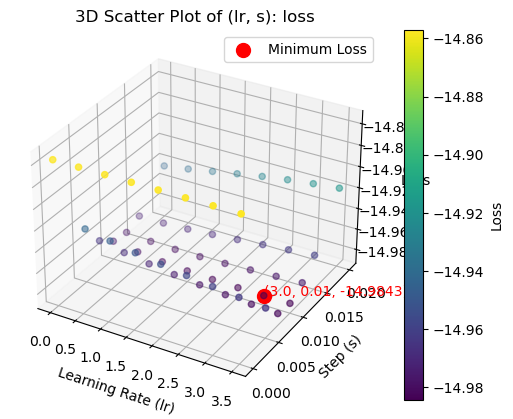

Just finished the selection: better loss -14.98432699440308 for mode DoubleBracketRotationType.group_commutator_third_order_reduced,                  with duration s=0.010005, and eo_d name = B Field
-14.98432699440308
Executing gci step 0:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.010005.
--- the report after execution:

VQE energy is -14.8569 and the DBQA yields -14.98433. 
            The target energy is -15.27613 which means the difference is for VQE             0.41923 and of the DBQA 0.2918             which can be compared to the spectral gap 1.08767.
            The relative difference is for VQE 2.74436%             and for DBQA 1.9102%.            The energetic fidelity witness for the ground state for the
            VQE is 0.61456 
            and DBQA 0.73172
            The true fidelity is 0.00247 (see boostvqe issue https://github.com/qiboteam/boostvqe/issues/51 why this value seems

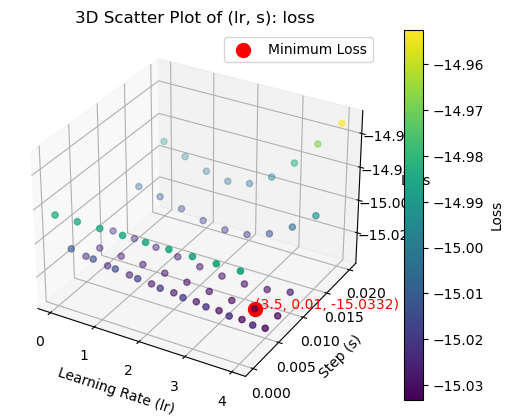

Just finished the selection: better loss -15.033202665318203 for mode DoubleBracketRotationType.group_commutator_third_order_reduced,                  with duration s=0.00750625, and eo_d name = B Field
-15.033202665318203
Executing gci step 1:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.00750625.
--- the report after execution:

VQE energy is -14.8569 and the DBQA yields -15.0332. 
            The target energy is -15.27613 which means the difference is for VQE             0.41923 and of the DBQA 0.24293             which can be compared to the spectral gap 1.08767.
            The relative difference is for VQE 2.74436%             and for DBQA 1.59025%.            The energetic fidelity witness for the ground state for the
            VQE is 0.61456 
            and DBQA 0.77665
            The true fidelity is 0.00257 (see boostvqe issue https://github.com/qiboteam/boostvqe/issues/51 why this valu

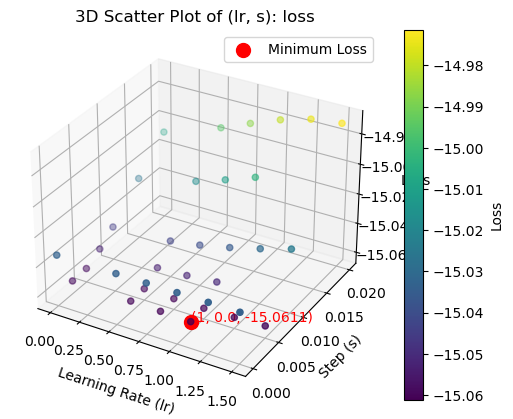

Just finished the selection: better loss -15.061140528898756 for mode DoubleBracketRotationType.group_commutator_third_order_reduced,                  with duration s=0.0025087499999999997, and eo_d name = B Field
-15.061140528898756
Executing gci step 2:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.0025087499999999997.
--- the report after execution:

VQE energy is -14.8569 and the DBQA yields -15.06114. 
            The target energy is -15.27613 which means the difference is for VQE             0.41923 and of the DBQA 0.21499             which can be compared to the spectral gap 1.08767.
            The relative difference is for VQE 2.74436%             and for DBQA 1.40736%.            The energetic fidelity witness for the ground state for the
            VQE is 0.61456 
            and DBQA 0.80234
            The true fidelity is 0.00258 (see boostvqe issue https://github.com/qiboteam/boostvqe/

In [1]:
from boostvqe.utils import *
    
gci_eval_counter = 1
dict_params = []
for nqubits in [10]:
    for nlayers in [7]:
        for seed in [42]:
            for target_epoch in [2000]:
                for eo_d in get_eo_d_initializations(nqubits)[-2:-1]:
                    mode_dbr_list =[#DoubleBracketRotationType.group_commutator_reduced,
                            #DoubleBracketRotationType.group_commutator_mix_twice,
                            #DoubleBracketRotationType.group_commutator_reduced_twice,
                            DoubleBracketRotationType.group_commutator_third_order_reduced,
                            #DoubleBracketRotationType.group_commutator_third_order_reduced_twice
                            ]
                    dict_params.append( dict(
                        nqubits=nqubits,
                        nlayers=nlayers,
                        seed = seed,
                        target_epoch = target_epoch,
                        nmb_gci_steps = 3,
                        nmb_gd_epochs = 1,
                        eo_d = eo_d,
                        mode_dbr_list = mode_dbr_list,
                        please_be_verbose = True,
                        please_be_visual = True
                    ))
                    
                    print(gci_eval_counter)
                    gci_eval_counter +=1
                    execute_gci_boost( **dict_params[-1] )
                    
                        
                    
